# Analisis de sentimientos

Sergio David Pérez Navarro

Vamos a realizar un análisis de los sentimientos de tres archivos que contienen información
de de los sentimientos de diferentes frases. Cada frase tiene asociado un número indicando si es positiva.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text

from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

textos = ["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"]
scores = np.array([])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i,texto in enumerate(textos):
    #mypath = "D:\\ml2\\BD\\miguel1\\sentiment_labelled_sentences\\" + texto
    mypath = "E:\Documentos\Dropbox\BD\miguel1\sentiment labelled sentences\\" + texto
    
    
    data = pd.read_csv(mypath, header=None, sep=r"\t", engine='python')
    data.columns = ['frase','sentimiento']
    
    X_train, X_test, y_train, y_test = train_test_split(data.ix[:,0], data.ix[:,1],test_size=0.25, random_state=101)
    
    vectorizer = text.CountVectorizer(ngram_range=(1,1), stop_words='english').fit(X_train)
    
    TfidF = text.TfidfTransformer()
    X = TfidF.fit_transform(vectorizer.transform(X_train))
    Xt = TfidF.transform(vectorizer.transform(X_test))
    
    param_grid = {'C': np.arange(0.01,1,0.01), 'loss':('squared_hinge','hinge')}
    #param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
    
    clf = GridSearchCV(LinearSVC(loss='hinge',random_state=101, max_iter=10), param_grid)
    clf = clf.fit(X, y_train)
    clf = clf.best_estimator_
    #print ("Best parameters: %s" % clf.best_params_)
    y_pred = clf.predict(Xt)
    scores = np.append(scores, metrics.accuracy_score(y_test, y_pred))
    
    fpr[i], tpr[i], _ = metrics.roc_curve(y_pred, y_test)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    print("======================================\n"+texto)
    print("Accuracy: %0.3f" % metrics.accuracy_score(y_test, y_pred))
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))

amazon_cells_labelled.txt
Accuracy: 0.788
     0   1
0  111  35
1   18  86
imdb_labelled.txt
Accuracy: 0.812
    0    1
0  97   25
1  22  106
yelp_labelled.txt
Accuracy: 0.772
    0   1
0  97  32
1  25  96


Podemos ver que los resultados son bastante satisfactorios en la clasificación. A continuación vamos a realizar una representación de las curvas ROC de los tres casos.

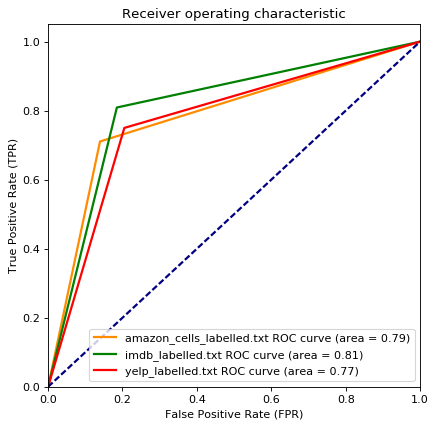

In [7]:
plt.figure(figsize=(6,6), dpi=80)
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',lw=lw, label='%s ROC curve (area = %0.2f)' % (textos[0],roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='green',lw=lw, label='%s ROC curve (area = %0.2f)' % (textos[1],roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='red',lw=lw, label='%s ROC curve (area = %0.2f)' % (textos[2],roc_auc[2]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

A continuación por curiosidad vamos a probar todos los textos juntos.

Todos
Accuracy: 0.800
     0    1
0  308   72
1   78  292


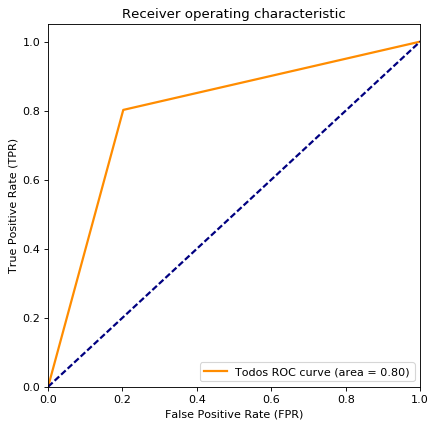

In [32]:
mypath = "E:\Documentos\Dropbox\BD\miguel1\sentiment labelled sentences\\" + textos[0]
data1 = pd.read_csv(mypath, header=None, sep=r"\t", engine='python')
mypath = "E:\Documentos\Dropbox\BD\miguel1\sentiment labelled sentences\\" + textos[1]
data2 = pd.read_csv(mypath, header=None, sep=r"\t", engine='python')
mypath = "E:\Documentos\Dropbox\BD\miguel1\sentiment labelled sentences\\" + textos[2]
data3 = pd.read_csv(mypath, header=None, sep=r"\t", engine='python')
data = pd.concat((data1,data2,data3), axis=0)

data.columns = ['frase','sentimiento']

X_train, X_test, y_train, y_test = train_test_split(data.ix[:,0], data.ix[:,1],test_size=0.25, random_state=101)

vectorizer = text.CountVectorizer(ngram_range=(1,1), stop_words='english').fit(X_train)

TfidF = text.TfidfTransformer()
X = TfidF.fit_transform(vectorizer.transform(X_train))
Xt = TfidF.transform(vectorizer.transform(X_test))

param_grid = {'C': np.arange(0.01,1,0.01), 'loss':('squared_hinge','hinge')}
#param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}

clf = GridSearchCV(LinearSVC(loss='hinge',random_state=101, max_iter=30), param_grid)
clf = clf.fit(X, y_train)
clf = clf.best_estimator_
#print ("Best parameters: %s" % clf.best_params_)
y_pred = clf.predict(Xt)
scores = np.append(scores, metrics.accuracy_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)

print("Todos")
print("Accuracy: %0.3f" % metrics.accuracy_score(y_test, y_pred))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))

plt.figure(figsize=(6,6), dpi=80)
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='%s ROC curve (area = %0.2f)' % ("Todos",roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Los resultados son muy similares a los conjuntos individuales analizados. En todo momento se ha empleado el clasificador LinearSVC por dar excelentes resultados frente a otros clasificadores.